In [1]:
import pandas as pd

data = pd.read_csv(r"C:\Users\DELL USER\Downloads\archive (2)\Crop_recommendation.csv")
print(data.head())
print(data.info())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [2]:
# Basic info about dataset
data.info()

# Check for missing values
data.isnull().sum()

# Quick statistics
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [3]:
# Drop rows with missing values
data = data.dropna()

# OR fill missing values with median (for numeric columns)
# data.fillna(data.median(), inplace=True)


In [4]:
data.duplicated().sum()
data = data.drop_duplicates()


In [5]:
data.columns = [col.strip().lower() for col in data.columns]


In [6]:
print(data.columns)


Index(['n', 'p', 'k', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


Shape of dataset: (2200, 8)

Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

Missing values:
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Duplicates: 0

Data types:
 N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


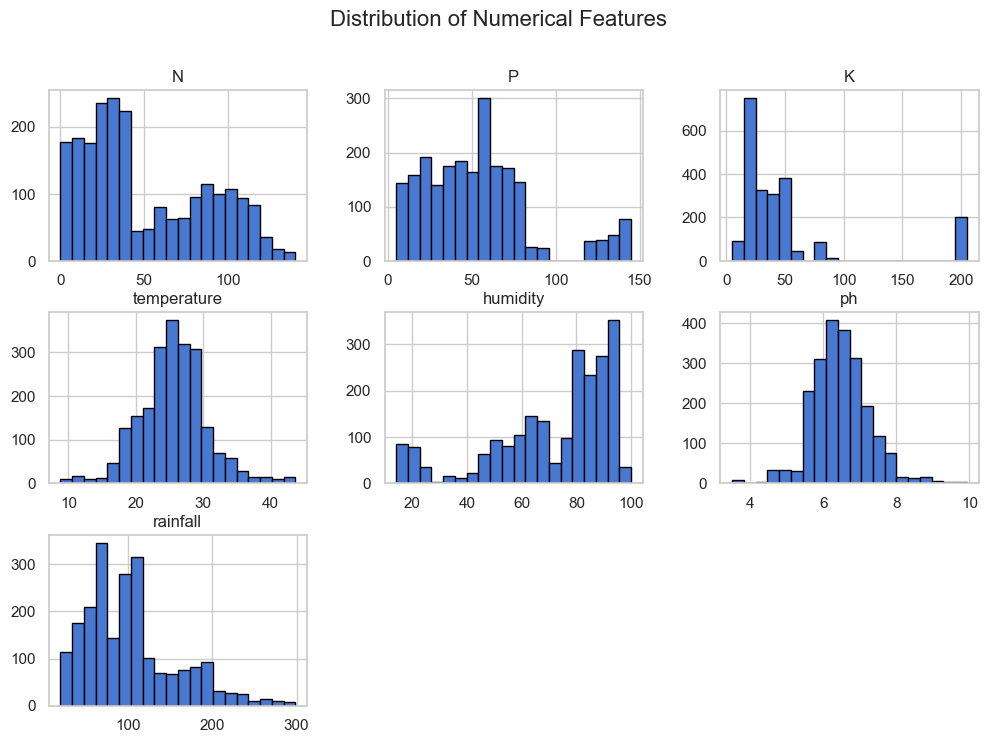

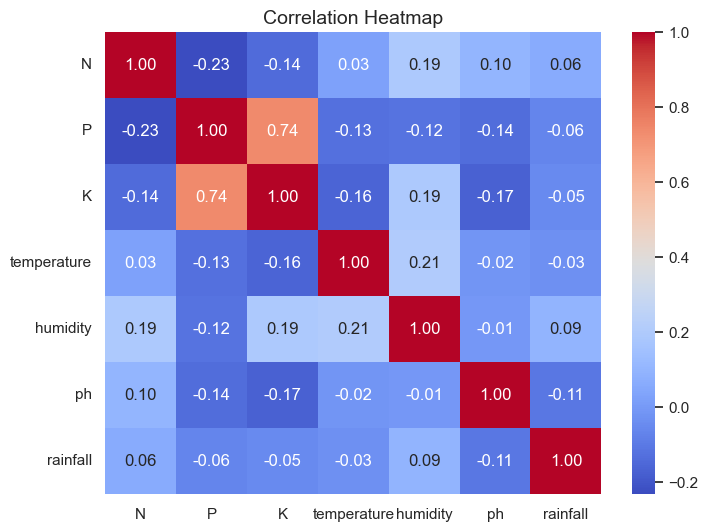

C:\Users\DELL USER\AppData\Local\Temp\ipykernel_4900\1366008877.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="label", order=df["label"].value_counts().index, palette="viridis")


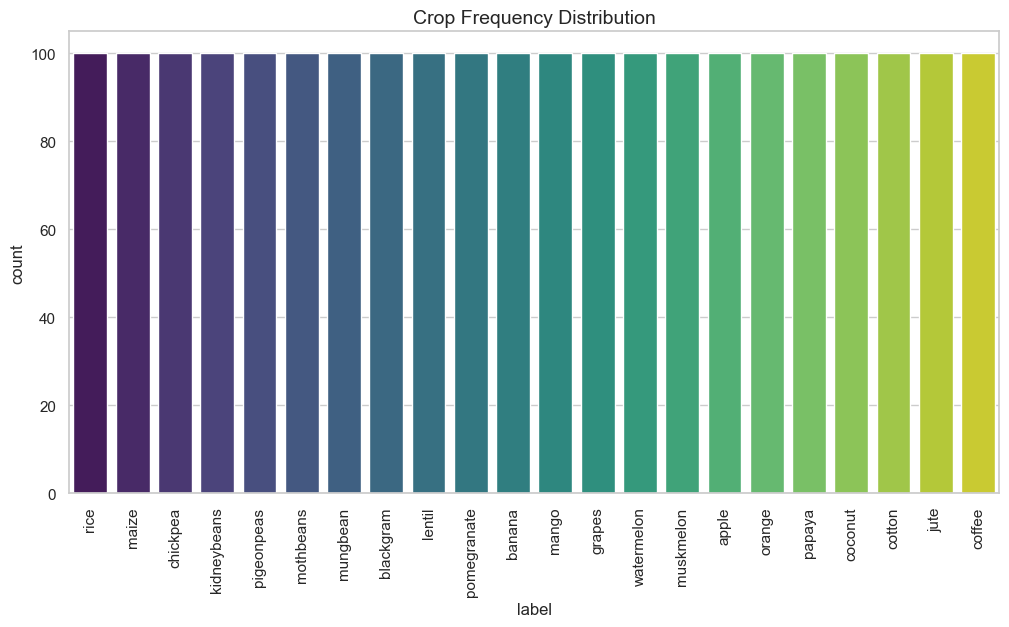

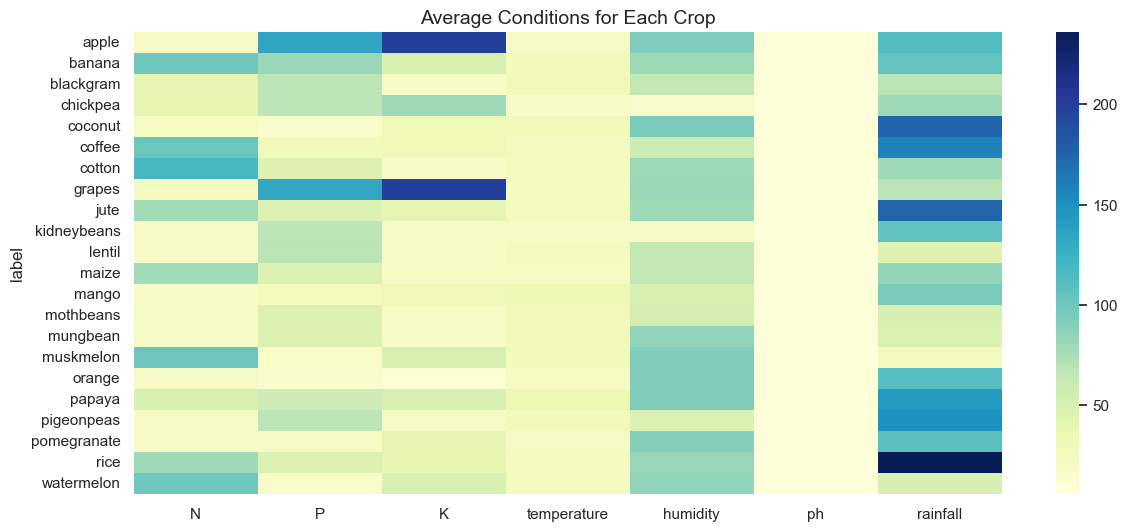

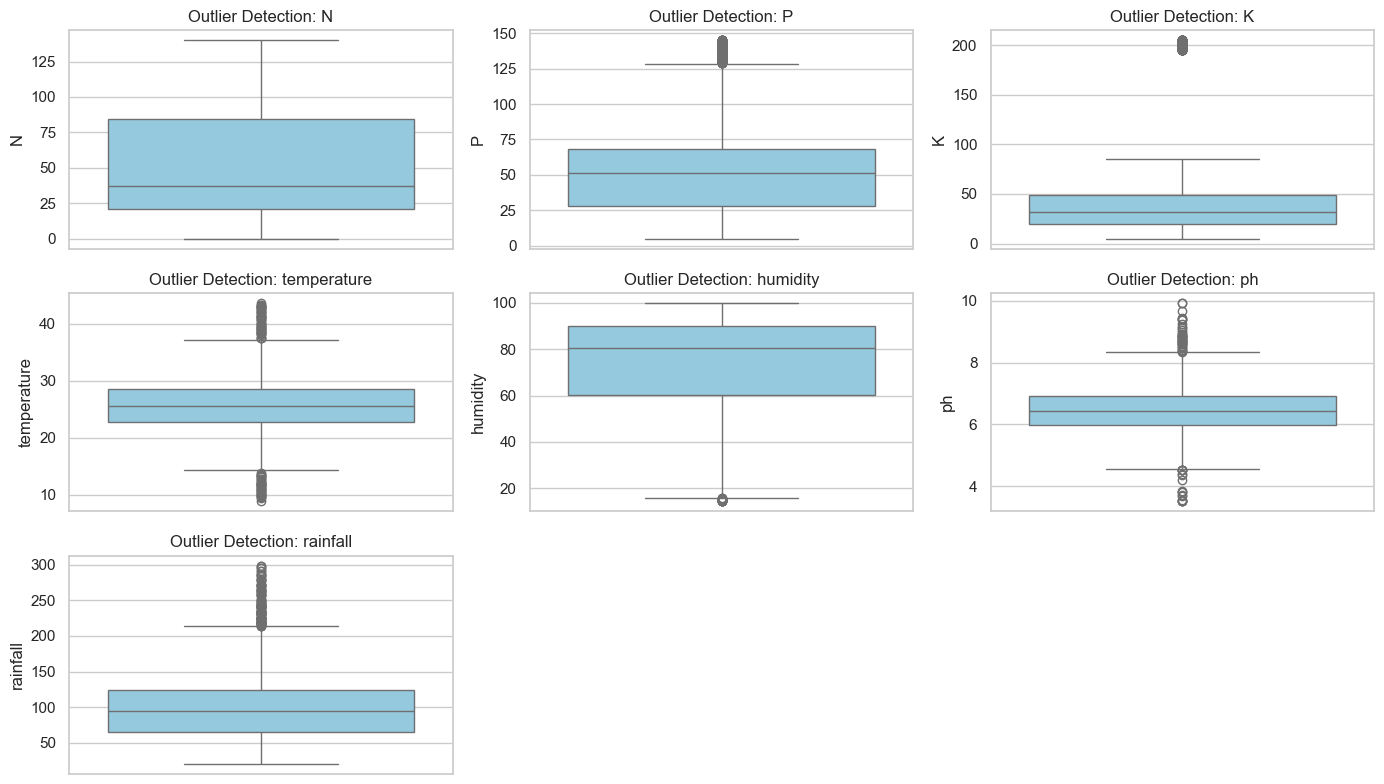

In [7]:
# ============================
# Crop Recommendation Dataset
# Data Cleaning & Visualization
# ============================

# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid", palette="muted")

# 2. Load Dataset
df = pd.read_csv(r"C:\Users\DELL USER\Downloads\archive (2)\Crop_recommendation.csv")

# 3. Basic Information
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())
print("\nData types:\n", df.dtypes)

# 4. Distribution of Numerical Features
df.hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# 6. Crop Frequency Count
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="label", order=df["label"].value_counts().index, palette="viridis")
plt.xticks(rotation=90)
plt.title("Crop Frequency Distribution", fontsize=14)
plt.show()

# 7. Average Environmental Conditions for Each Crop
avg_conditions = df.groupby("label")[["N","P","K","temperature","humidity","ph","rainfall"]].mean()

plt.figure(figsize=(14,6))
sns.heatmap(avg_conditions, cmap="YlGnBu")
plt.title("Average Conditions for Each Crop", fontsize=14)
plt.show()

# 8. Outlier Detection with Boxplots
plt.figure(figsize=(14,8))
for i, col in enumerate(["N","P","K","temperature","humidity","ph","rainfall"], 1):
    plt.subplot(3,3,i)
    sns.boxplot(data=df, y=col, color="skyblue")
    plt.title(f"Outlier Detection: {col}")
plt.tight_layout()
plt.show()

# 9. Pairplot for Feature Relationships (Optional - may take time)
# sns.pairplot(df, hue="label")
# plt.show()


Accuracy: 0.9954545454545455
Macro F1: 0.9954517027687758
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00

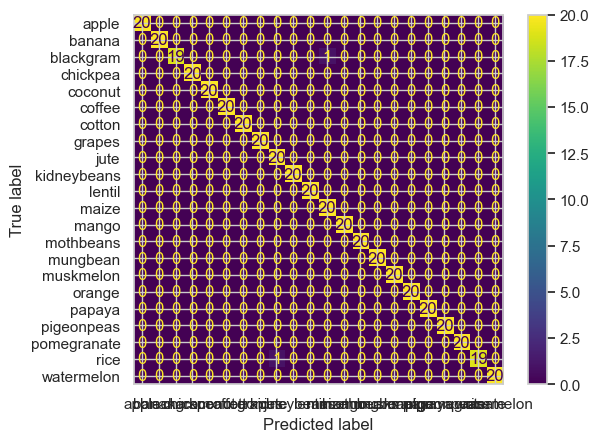

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

num_cols = X.columns.tolist()
preprocess = ColumnTransformer([('num', StandardScaler(), num_cols)], remainder='drop')

clf = Pipeline([
    ('prep', preprocess),
    ('model', RandomForestClassifier(random_state=42))
])

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred))
print('Macro F1:', f1_score(y_test, pred, average='macro'))
print(classification_report(y_test, pred, zero_division=0))
ConfusionMatrixDisplay.from_predictions(y_test, pred)


In [9]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from xgboost import XGBClassifier


Accuracy: 0.9886363636363636
Macro F1: 0.9887226097483732
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.87      1.00      0.93        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.95      0.97        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00

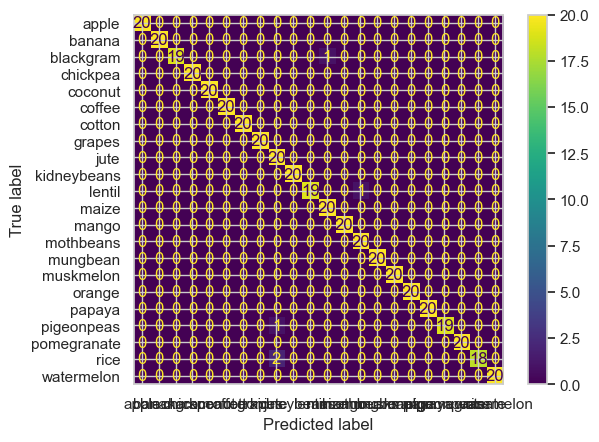

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

gb = Pipeline([
    ('prep', preprocess),
    ('model', GradientBoostingClassifier(random_state=42))
])

gb.fit(X_train, y_train)
pred = gb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))
print("Macro F1:", f1_score(y_test, pred, average='macro'))
print(classification_report(y_test, pred, zero_division=0))
ConfusionMatrixDisplay.from_predictions(y_test, pred)


In [13]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, RandomizedSearchCV
from xgboost import XGBClassifier

xgb = Pipeline([
    ('prep', preprocess),
    ('model', XGBClassifier(
        tree_method='hist', eval_metric='mlogloss', random_state=42
    ))
])

param_grid = {
    'model__n_estimators': [200, 400, 600],
    'model__max_depth': [3, 5, 7, 9],
    'model__learning_rate': [0.05, 0.1, 0.2],
    'model__subsample': [0.7, 0.9, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(xgb, param_grid, n_iter=12, cv=cv, scoring='f1_macro', n_jobs=-1, random_state=42)
search.fit(X_train, y_train)
print('Best F1_macro:', search.best_score_)
best_model = search.best_estimator_


ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "d:\precision_agri\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\precision_agri\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\precision_agri\venv\Lib\site-packages\sklearn\pipeline.py", line 663, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "d:\precision_agri\venv\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "d:\precision_agri\venv\Lib\site-packages\xgboost\sklearn.py", line 1641, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21], got ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


In [14]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels into numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Original labels:", list(y.unique())[:5])
print("Encoded labels:", y_encoded[:5])


Original labels: ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas']
Encoded labels: [20 20 20 20 20]


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

gb.fit(X_train, y_train)
preds = gb.predict(X_test)


In [18]:
print("Predicted labels:", le.inverse_transform(preds[:10]))


Predicted labels: ['orange' 'banana' 'cotton' 'maize' 'orange' 'chickpea' 'rice' 'blackgram'
 'banana' 'orange']


In [19]:
print("Type of preds:", type(preds[0]))
print("Sample preds:", preds[:10])


Type of preds: <class 'numpy.int64'>
Sample preds: [16  1  6 11 16  3 20  2  1 16]


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.87      1.00      0.93        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.95      0.97        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
      papaya       1.00    

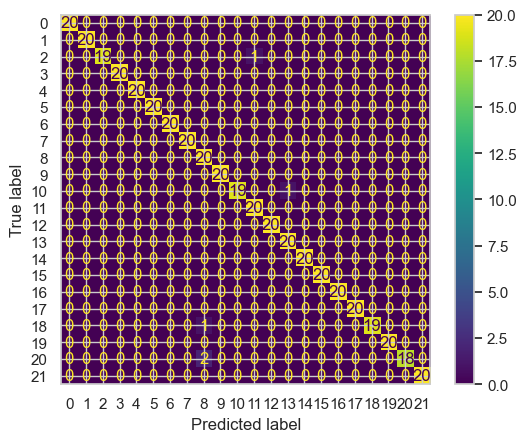

In [20]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, preds, target_names=le.classes_))
ConfusionMatrixDisplay.from_predictions(y_test, preds)


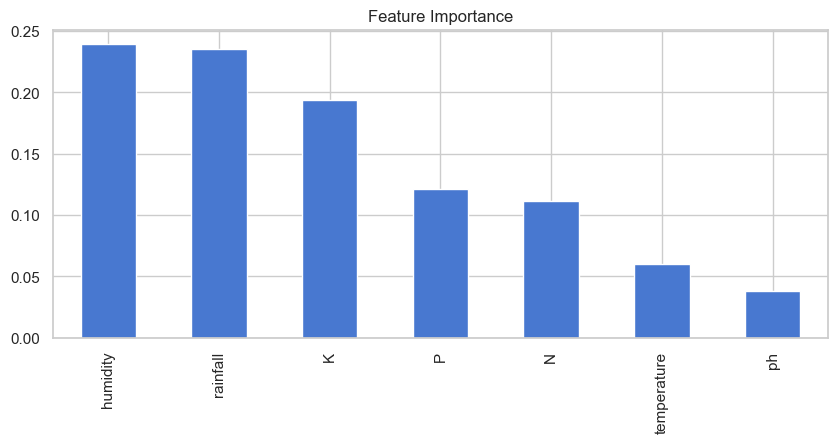

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

importances = gb.named_steps['model'].feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

feat_imp.plot(kind="bar", figsize=(10,4), title="Feature Importance")
plt.show()


In [24]:
def recommend_crop(sample, model, le, top_k=3):
    x = pd.DataFrame([sample], columns=X.columns)
    preds_proba = model.predict_proba(x)[0]
    top_idx = preds_proba.argsort()[::-1][:top_k]
    return [(le.classes_[i], preds_proba[i]) for i in top_idx]

sample = {"N":90,"P":40,"K":42,"temperature":25,"humidity":80,"ph":6.5,"rainfall":200}
print(recommend_crop(sample, gb, le))


[('rice', np.float64(0.8812689425992893)), ('jute', np.float64(0.11832564179146815)), ('mothbeans', np.float64(7.660746148888993e-05))]


In [25]:
import joblib

# Save trained model and label encoder
joblib.dump(gb, "crop_model.pkl")
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

In [27]:
import pickle

# Save trained model
with open("model.pkl", "wb") as f:
    pickle.dump(gb, f)   # replace gb with your model variable

# Save label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)


In [26]:
import streamlit as st
import pandas as pd
import joblib

# Load model and encoder
model = joblib.load("crop_model.pkl")
le = joblib.load("label_encoder.pkl")

st.title("🌱 Sustainable Crop Recommendation System")

# User inputs
N = st.number_input("Nitrogen (N)", min_value=0, max_value=200, value=90)
P = st.number_input("Phosphorus (P)", min_value=0, max_value=200, value=40)
K = st.number_input("Potassium (K)", min_value=0, max_value=200, value=42)
temperature = st.number_input("Temperature (°C)", min_value=0.0, max_value=50.0, value=25.0)
humidity = st.number_input("Humidity (%)", min_value=0.0, max_value=100.0, value=80.0)
ph = st.number_input("Soil pH", min_value=0.0, max_value=14.0, value=6.5)
rainfall = st.number_input("Rainfall (mm)", min_value=0.0, max_value=500.0, value=200.0)

if st.button("Recommend Crop"):
    # Create DataFrame for prediction
    sample = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]],
                          columns=["N","P","K","temperature","humidity","ph","rainfall"])
    
    preds_proba = model.predict_proba(sample)[0]
    top_idx = preds_proba.argsort()[::-1][:3]  # top 3 crops
    
    st.subheader("Recommended Crops:")
    for i in top_idx:
        st.write(f"✅ {le.classes_[i]} (confidence: {preds_proba[i]:.2f})")


2025-08-23 14:47:49.270 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 14:47:49.516 
  command:

    streamlit run d:\precision_agri\venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-23 14:47:49.519 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 14:47:49.519 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 14:47:49.519 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 14:47:49.519 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 14:47:49.519 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-23 14:47:49.519 Thread 'MainThread': miss